In [67]:
!pip install scikit-learn
!pip install matplotlib
!pip install pandas
!pip install numpy
!pip install opencv-python-headless

In [68]:
import numpy as np
import cv2
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt

In [69]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

# Convert target to integer
y = y.astype(np.int8)

# Take a subset of 10,000 samples
X_subset, _, y_subset, _ = train_test_split(X, y, train_size=20000, stratify=y, random_state=42)

In [70]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

# Create a pipeline with a scaler and the SVM classifier
clf = make_pipeline(StandardScaler(), SVC(kernel='linear', random_state=42))

# Train the model
clf.fit(X_subset, y_subset)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear', random_state=42))])

In [71]:
# Split the subset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2, stratify=y_subset, random_state=42)

# Train the model on the training set
clf.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = clf.score(X_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")

Test accuracy: 0.9123


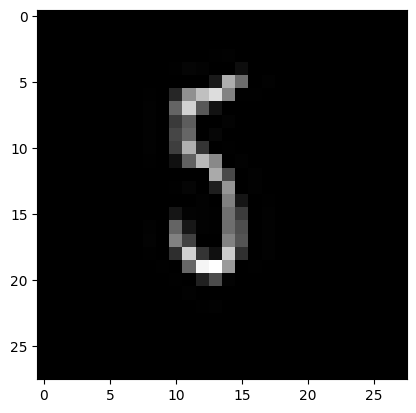

Predicted digit: 5


/home/mrstatic/Documents/ML-project/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [72]:

def preprocess_image(image_path):
    """Preprocess an image to match the MNIST format."""
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28), Image.LANCZOS)  # Resize to 28x28 using LANCZOS filter
    img_array = np.array(img)
    img_array = 255 - img_array  # Invert colors: MNIST has white digits on black background
    img_array = img_array / 255.0  # Normalize to [0, 1] range
    img_array = img_array.flatten().reshape(1, -1)  # Flatten and reshape for the model
    return img_array

def predict_digit(image_path):
    """Predict the digit in the given image."""
    img_array = preprocess_image(image_path)
    plt.imshow(img_array.reshape(28, 28), cmap='gray')
    plt.show()
    prediction = clf.predict(img_array)
    return prediction[0]

# Example usage
image_path = './test.png'
predicted_digit = predict_digit(image_path)
print(f"Predicted digit: {predicted_digit}")